# Spearman Rank Correlation Coefficient
The Spearman rank correlation coefficient (Spearman’s ρ or rho) is a non-parametric **measure of association** that quantifies the strength and direction of a **monotonic relationship** between two variables.

Unlike Pearson’s correlation, which operates on raw values, Spearman operates on the **ranks** of the data. This makes it more robust to outliers, skewed distributions, and nonlinear relationships.

Spearman answers a slightly different question than Pearson:
- Do higher values of X tend to correspond to higher (or lower) values of Y, regardless of the exact functional form?

## Conceptual intuition
Pearson evaluates how well points align with a straight line.
Spearman evaluates whether points follow a consistently increasing or decreasing trend, even if the curve is nonlinear.

If you sort X from smallest to largest:
- Do the corresponding Y values also tend to increase? → positive Spearman
- Do they tend to decrease? → negative Spearman
- Do they behave inconsistently? → Spearman near zero


This makes Spearman especially useful when:
- Order is meaningful
- The relationship is curved but directional

Spearman correlation is simply pearson correlation **applied to the ranked data instead of the raw data**.

## Structural assumptions and practical considerations
Conditions to consider:
- Observations must be paired $(x_i, y_i)$
- Observations should be independent
- The relationship should be approximately monotonic (consistently increasing or decreasing)
- Variables should be at least ordinal (rankable)

If the relationship is not monotonic (e.g., U-shaped), Spearman will also fail to capture the dependency

## Interpretation
Spearman’s ρ ranges from −1 to +1, just like Pearson.
- Values close to +1 indicate a strong positive monotonic relationship
- Values close to −1 indicate a strong negative monotonic relationship
- Values close to 0 indicate lack of consistent monotonic pattern

Important nuance:
A low Spearman value does not mean variables are independent.
It means there is no consistent directional ordering between them.

**Spearman correlation is not a replacement for Pearson, but a complementary diagnostic tool. It allows the data scientist to detect consistent directional relationships when linear assumptions break down, making it especially valuable for messy, real-world data.**

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import spearmanr 

In [2]:
data_folder = Path('../../datasets/')
data_set = data_folder / 'world_happiness.csv'
df = pd.read_csv(data_set, sep=';', decimal=',')
df.head()

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015
1,2,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015
2,3,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015
3,4,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015
4,5,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1502 non-null   int64  
 1   Country                       1502 non-null   object 
 2   Regional indicator            1499 non-null   object 
 3   Happiness score               1502 non-null   float64
 4   GDP per capita                1502 non-null   float64
 5   Social support                1502 non-null   float64
 6   Healthy life expectancy       1502 non-null   int64  
 7   Freedom to make life choices  1502 non-null   float64
 8   Generosity                    1502 non-null   float64
 9   Perceptions of corruption     1502 non-null   float64
 10  Year                          1502 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 129.2+ KB



### Happiness score vs GDP per capita

GDP per capita is commonly hypothesized to be associated with subjective well-being. We examine whether this relationship exhibits a monotonic structure suitable for Spearman’s correlation.

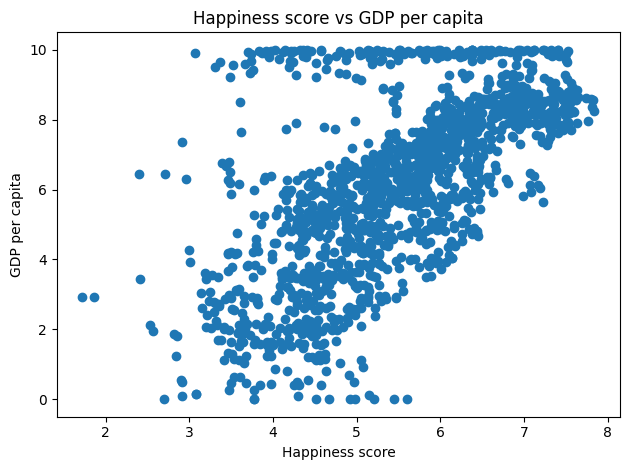

In [4]:
fig, ax = plt.subplots()
ax.scatter(df['Happiness score'], df['GDP per capita'])

plt.title('Happiness score vs GDP per capita')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')
plt.tight_layout()
plt.show()

In [5]:
rho, _ = spearmanr(df['Happiness score'], df['GDP per capita'])
print('Happiness vs GDP per capita correlation coefficient:', rho)

Happiness vs GDP per capita correlation coefficient: 0.6467155203825014


Both Pearson’s r and Spearman’s ρ indicate a positive association between GDP and Happiness. This means that countries with higher GDP tend to also present higher happiness scores.

The scatterplot supports this conclusion, showing a clear upward trend between the two variables.

In practical terms, both methods are capturing the same underlying structure in the data, which increases confidence that the observed association is stable and not an artifact of a specific metric.

### Happiness score vs Social support

We now analyze the relationship between Happiness score and Social Support. From a conceptual perspective, a positive monotonic association is expected: individuals with stronger social support networks tend to report higher levels of well-being.

The analysis focuses on whether higher levels of social support are consistently associated with higher happiness scores, regardless of the exact shape of the relationship.

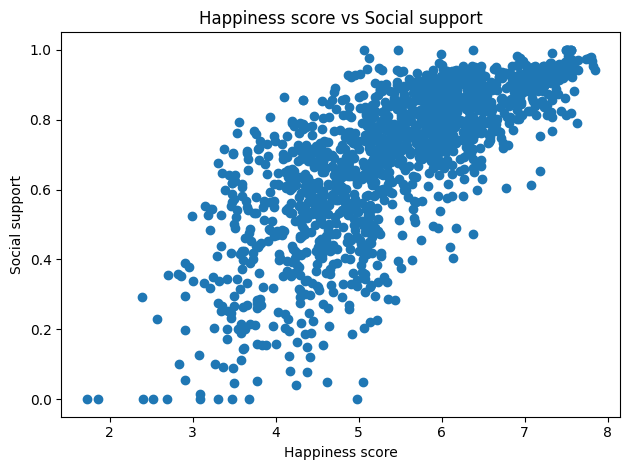

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['Happiness score'], df['Social support'])

plt.title('Happiness score vs Social support')
plt.xlabel('Happiness score')
plt.ylabel('Social support')
plt.tight_layout()
plt.show()

In [7]:

rho, _ = spearmanr(df['Happiness score'], df['Social support'])
print('Happiness vs Generosity correlation coefficient:', rho)

Happiness vs Generosity correlation coefficient: 0.7724549264082293


The scatterplot shows a clear upward trend, and the Spearman correlation (ρ = 0.77) indicates a strong positive monotonic relationship between the variables.


# Correlation matrix
Rather than examining pairwise relationships in isolation, we can compute a correlation matrix to summarize monotonic associations across multiple variables simultaneously. This provides a high-level view of potential relationships worth deeper investigation.

In [8]:
df.loc[:, 'Happiness score':'Perceptions of corruption'].corr(method='spearman')

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Happiness score,1.000000,0.646716,0.772455,0.684350,0.596594,0.109386,0.073602
GDP per capita,0.646716,1.000000,0.588776,0.628666,0.321840,-0.056331,-0.076242
Social support,0.772455,0.588776,1.000000,0.581456,0.466880,0.050208,0.090219
Healthy life expectancy,0.684350,0.628666,0.581456,1.000000,0.376119,0.014865,-0.198267
Freedom to make life choices,0.596594,0.321840,0.466880,0.376119,1.000000,0.319755,0.131435
Generosity,0.109386,-0.056331,0.050208,0.014865,0.319755,1.000000,0.074085
Perceptions of corruption,0.073602,-0.076242,0.090219,-0.198267,0.131435,0.074085,1.000000
